**Imports and workspace setting**

C4.5 implementation is taken from https://github.com/michaeldorner/DecisionTrees

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from sklearn.model_selection import train_test_split
from sklearn import metrics
from DecisionTrees import implementation as c45

plt.style.use('ggplot')

**Loading data file**

In [50]:
cancerData = pd.read_csv('../data/breast-cancer-wisconsin.data', header=None)
cancerData.drop(cancerData.columns[0],axis=1,inplace=True)
cancerData = cancerData.replace('?', np.nan)
cancerData.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Stats of the data**

In [51]:
cancerData.shape

(699, 10)

**Class distribution of benign (2) and malignant (4)**

Class distribution is skewed towards benign.

Text(0.5, 0, 'Class')

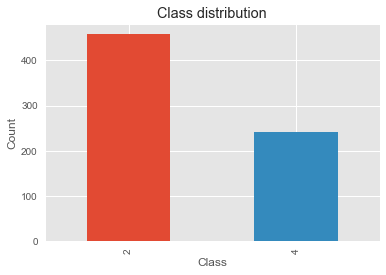

In [52]:
fig, ax = plt.subplots(figsize=(6,4))
axes = cancerData[10].value_counts().plot(kind='bar', title='Class distribution')
axes.set_ylabel('Count')
axes.set_xlabel('Class')

**Drop missing values**

In [53]:
cancerDataAfterMissingValuesDropped = cancerData.dropna()
cancerDataAfterMissingValuesDropped.shape

(683, 10)

**Holdout to create training (65%) and testing (35%) dataset**

In [54]:
y = cancerDataAfterMissingValuesDropped.values[:,-1]
y=y.astype('int')

X = cancerDataAfterMissingValuesDropped.values[:,:-1]
X=X.astype('int')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

(443, 9),(443,)
(240, 9),(240,)


In [56]:
first = np.reshape(X_train, (-1,9))
second = np.reshape(y_train, (-1, 1))
training = np.concatenate((first, second), axis=1)


**Fit Decision tree (C4.5) model**

In [57]:
decisionTree = c45.growDecisionTreeFrom(training)		
c45.plot(decisionTree)

Column 1: x == 1?
yes -> Column 5: x == 5?
		yes -> Column 4: x == 2?
				yes -> {2: 5}
				no  -> {4: 2}
		no  -> {2: 243}
no  -> Column 5: x == 1?
		yes -> Column 1: x == 10?
				yes -> {4: 6}
				no  -> Column 4: x == 6?
						yes -> {4: 2}
						no  -> Column 4: x == 5?
								yes -> {4: 1}
								no  -> {2: 32}
		no  -> Column 5: x == 10?
				yes -> Column 4: x == 7?
						yes -> Column 0: x == 5?
								yes -> {2: 1}
								no  -> {4: 1}
						no  -> {4: 77}
				no  -> Column 4: x == 2?
						yes -> Column 0: x == 3?
								yes -> {2: 3}
								no  -> Column 5: x == 2?
										yes -> Column 0: x == 9?
												yes -> {4: 1}
												no  -> {2: 4}
										no  -> Column 0: x == 4?
												yes -> {2: 1}
												no  -> Column 2: x == 2?
														yes -> Column 0: x == 5?
																yes -> {2: 1}
																no  -> {4: 1}
														no  -> {4: 5}
						no  -> Column 1: x == 10?
								yes -> {4: 15}
								no  -> Column 0: x == 5?
										ye

**Prune the tree to avoid overfitting**

In [58]:
c45.prune(decisionTree, 0.5, notify=True) # notify, when a branch is pruned (one time in this example)
c45.plot(decisionTree)

A branch was pruned: gain = 0.195909
A branch was pruned: gain = 0.237286
A branch was pruned: gain = 0.399031
Column 1: x == 1?
yes -> Column 5: x == 5?
		yes -> Column 4: x == 2?
				yes -> {2: 5}
				no  -> {4: 2}
		no  -> {2: 243}
no  -> Column 5: x == 1?
		yes -> {4: 9, 2: 32}
		no  -> Column 5: x == 10?
				yes -> Column 4: x == 7?
						yes -> Column 0: x == 5?
								yes -> {2: 1}
								no  -> {4: 1}
						no  -> {4: 77}
				no  -> Column 4: x == 2?
						yes -> Column 0: x == 3?
								yes -> {2: 3}
								no  -> Column 5: x == 2?
										yes -> Column 0: x == 9?
												yes -> {4: 1}
												no  -> {2: 4}
										no  -> Column 0: x == 4?
												yes -> {2: 1}
												no  -> Column 2: x == 2?
														yes -> Column 0: x == 5?
																yes -> {2: 1}
																no  -> {4: 1}
														no  -> {4: 5}
						no  -> Column 1: x == 10?
								yes -> {4: 15}
								no  -> Column 0: x == 5?
										yes -> Column 1: x == 5?
												ye

**Classifying using the tree created**

In [59]:
predicted = []
for row in X_test:
    dictResult = c45.classify(row, decisionTree)
    label = max(dictResult.items(), key=operator.itemgetter(1))[0]
    predicted.append(label)
    
predictions = np.array(predicted)
print('Accuracy score = ', metrics.accuracy_score(y_test, predictions))

Accuracy score =  0.9291666666666667


**Classification report**

In [60]:
target_names = ['2 (benign)', '4 (malignant)']
print(metrics.classification_report(y_test,predictions, target_names=target_names, digits=3))

               precision    recall  f1-score   support

   2 (benign)      0.917     0.973     0.944       147
4 (malignant)      0.952     0.860     0.904        93

    micro avg      0.929     0.929     0.929       240
    macro avg      0.935     0.917     0.924       240
 weighted avg      0.931     0.929     0.928       240



**Confusion metrix**

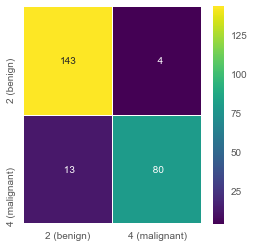

In [61]:
cm = metrics.confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(4,4))
ticklabels = ["2 (benign)","4 (malignant)"]
ax = sns.heatmap(cm, xticklabels=ticklabels, yticklabels=ticklabels, linewidths=0.1, annot=True, fmt='3.0f',cmap=plt.cm.viridis)

**Conclusions**
1. Pruning was used to avoid overfitting to training data.
2. There was no method in this implementation to solve class skewness problem as in Logistic Regression hence KPIs were not good as for class 2 (malignant).